In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

### **Task 1: Load and Explore the Dataset**

Feature matrix (x_train): (60000, 28, 28)
Target matrix (y_train): (60000,)
Feature matrix (x_test): (10000, 28, 28)
Target matrix (y_test): (10000,)


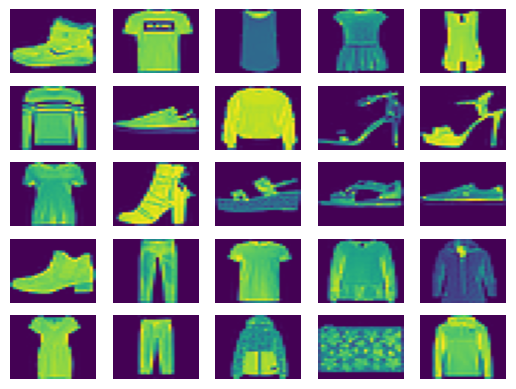

In [10]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize image pixel values by dividing by 255 (grayscale)
gray_scale = 255
x_train = x_train.astype('float32') / gray_scale
x_test = x_test.astype('float32') / gray_scale

# Checking the shape of feature and target matrices
print("Feature matrix (x_train):", x_train.shape)
print("Target matrix (y_train):", y_train.shape)
print("Feature matrix (x_test):", x_test.shape)
print("Target matrix (y_test):", y_test.shape)

# Visualizing 100 images from the training data
fig, ax = plt.subplots(5, 5)
k = 0
for i in range(5):
    for j in range(5):
        ax[i][j].imshow(x_train[k].reshape(28, 28), aspect='auto')
        ax[i][j].axis("off")  # Hide axes
        k += 1
plt.show()

### **Task 2: Build a MLP Model with a Different Architecture**

In [15]:
# Building the Sequential neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten input from 28x28 images to 784 (28*28) vector
    Dense(512, activation='relu'),
    Dense(256, activation='relu'), 
    Dense(128, activation='relu'),  
    Dense(10, activation='softmax'),   # Output layer for 10 classes
])


### **Task 3: Compile and Train the Model**

In [29]:
# Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
              
# Training the model with training data
history = model.fit(x_train, y_train, epochs=15, batch_size=1024, validation_split=0.2)

Epoch 1/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8821 - loss: 0.3972 - val_accuracy: 0.8893 - val_loss: 0.3096
Epoch 2/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9278 - loss: 0.1954 - val_accuracy: 0.8952 - val_loss: 0.3027
Epoch 3/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9332 - loss: 0.1813 - val_accuracy: 0.8941 - val_loss: 0.2992
Epoch 4/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9358 - loss: 0.1741 - val_accuracy: 0.8861 - val_loss: 0.3320
Epoch 5/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9335 - loss: 0.1803 - val_accuracy: 0.8945 - val_loss: 0.3040
Epoch 6/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9404 - loss: 0.1631 - val_accuracy: 0.8917 - val_loss: 0.3216
Epoch 7/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9402 - loss: 0.1580 - val_accuracy: 0.8947 - val_loss: 0.3242
Epoch 8/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9449 - loss: 0.1496 - val_accuracy: 0.8958 - v

### **Task 4: Evaluate the Model**

Test loss, Test accuracy: [0.3896942734718323, 0.8938000202178955]


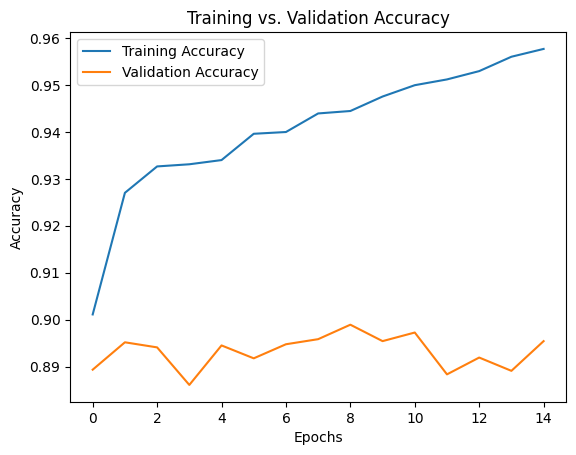

In [32]:
# Evaluating the model on test data
results = model.evaluate(x_test, y_test, verbose=0)
print('Test loss, Test accuracy:', results)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


The model did improve over time. This can clearly be seen in the graph for training accuracy. The accuracy steadily increases after initial training (epochs 1 & 2). It can also be seen in the output from task 3, where the accuracy consistently increases with each epoch.
- Meadow Motz